In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from IPython.display import Image
import glob
import cv2
import seaborn as sns
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

    
def get_outliers_row_idecies(df, name, sd):
    outliers_row_indecies = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    return outliers_row_indecies

# Regression chart.

def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    

def read_images(path_images='drive/My Drive/Colab Notebooks/Houses Dataset/'):
    '''Loading images and creating Datafram'''
    
    img = pd.DataFrame()

    #Bathroom Image
    bathroom_images=[]
    for number in range(1, 536):
        for path in glob.glob(path_images + str(number) + "_bathroom.jpg"):
            if os.path.isfile(path):
                bathroom_images.append(path)

    img['Bathroom_img'] = bathroom_images
    
    #Bedroom Image
    bedroom_images=[]
    for number in range(1, 536):
        for path in glob.glob(path_images + str(number) + "_bedroom.jpg"):
            if os.path.isfile(path):
                bedroom_images.append(path)

    img['Bedroom_img'] = bedroom_images
    
    #FrontalImage
    frontal_images=[]
    for number in range(1, 536):
        for path in glob.glob(path_images + str(number) + "_frontal.jpg"):
            if os.path.isfile(path):
                frontal_images.append(path)

    img['Frontal_img'] = frontal_images
    
    #Kitchen Image
    kitchen_images=[]
    for number in range(1, 536):
        for path in glob.glob(path_images + str(number) + "_kitchen.jpg"):
            if os.path.isfile(path):
                kitchen_images.append(path)

    img['Kitchen_img'] = kitchen_images
    
    return img



def concate_images(img):
    images_output=[]
    for row_index,row in img.iterrows():
        inputImages=[]
        outputImage = np.zeros((128, 128, 3), dtype="uint8")
        image_temp1 = cv2.imread(row.Bathroom_img)
        image1 = cv2.resize(image_temp1, (64 , 64))

        image_temp2 = cv2.imread(row.Bedroom_img)
        image2 = cv2.resize(image_temp2, (64 , 64))

        image_temp3 = cv2.imread(row.Frontal_img)
        image3 = cv2.resize(image_temp3, (64 , 64))

        image_temp4 = cv2.imread(row.Kitchen_img)
        image4 = cv2.resize(image_temp4, (64 , 64))

        inputImages.append(image1)
        inputImages.append(image2)
        inputImages.append(image3)
        inputImages.append(image4)

        outputImage[0:64, 0:64] = inputImages[0]
        outputImage[0:64, 64:128] = inputImages[1]
        outputImage[64:128, 64:128] = inputImages[2]
        outputImage[64:128, 0:64] = inputImages[3]


        images_output.append(outputImage)
    return images_output

## Importing Dataset

In [0]:
data_path = "/content/gdrive/My Drive/MS/CSC 215/Project-3/Houses Dataset/"

In [0]:
file = os.path.join('drive/My Drive/Colab Notebooks/Houses Dataset/HousesInfo.txt')

In [0]:
cols = ['Bedrooms', 'Bathrooms', 'Area', 'Zipcode', 'Price']

In [0]:
data = pd.read_csv(file, sep=' ', header=None, names=cols, na_values=[None, 'NA', '-', ' '])

In [7]:
data.head()

,Bedrooms,Bathrooms,Area,Zipcode,Price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226


In [8]:
data.shape

(535, 5)

In [9]:
data.isnull().sum()

Bedrooms     0
Bathrooms    0
Area         0
Zipcode      0
Price        0
dtype: int64

# Outliars checking

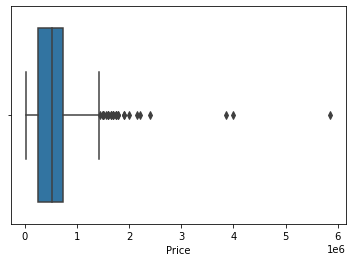

In [10]:
sns.boxplot(x=data['Price'])


# Image Processing

In [0]:
## Bathroom.jpg
new_images=[]
for number in range(1, 536):
    for path in glob.glob("drive/My Drive/Colab Notebooks/Houses Dataset/" + str(number) + "_bathroom.jpg"):
        if os.path.isfile(path):
            new_images.append(path)

In [ ]:
new_images

In [0]:
img= pd.DataFrame(new_images,columns = ['bathroom_img'])

In [0]:
## bedroom images
bedroom_images = []
for number in range(1, 536):
    for path in glob.glob("drive/My Drive/Colab Notebooks/Houses Dataset/" + str(number) + "_bedroom.jpg"):
        if os.path.isfile(path):
            bedroom_images.append(path) 
            
img['bedroom_img']=bedroom_images

In [0]:
img['bedroom_img']=bedroom_images

In [0]:
frontal_images = []
for number in range(1, 536):
    for path in glob.glob("drive/My Drive/Colab Notebooks/Houses Dataset/" + str(number) + "_frontal.jpg"):
        if os.path.isfile(path):
            frontal_images.append(path) 

img['frontal_img']=frontal_images

In [0]:
kitchen_images = []
for number in range(1, 536):
    for path in glob.glob("drive/My Drive/Colab Notebooks/Houses Dataset/" + str(number) + "_kitchen.jpg"):
        if os.path.isfile(path):
            kitchen_images.append(path) 

img['kitchen_img']=kitchen_images

In [19]:
img.shape

(535, 4)

# Combining text and visual data 

In [0]:
final = pd.concat([data, img], axis=1, sort=False)

In [21]:
final.head()

,Bedrooms,Bathrooms,Area,Zipcode,Price,bathroom_img,bedroom_img,frontal_img,kitchen_img
0,4,4.0,4053,85255,869500,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...
1,4,3.0,3343,36372,865200,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...
2,3,4.0,3923,85266,889000,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...
3,5,5.0,4022,85262,910000,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...
4,3,4.0,4116,85266,971226,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...


In [22]:
result = final[final['Price'] >=100000] 
result = result[result['Price'] <=900000] 

result

,Bedrooms,Bathrooms,Area,Zipcode,Price,bathroom_img,bedroom_img,frontal_img,kitchen_img
0,4,4.0,4053,85255,869500,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...
1,4,3.0,3343,36372,865200,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...
2,3,4.0,3923,85266,889000,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...
6,3,4.0,2544,85262,799000,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...
10,5,5.0,4829,85266,519200,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...
...,...,...,...,...,...,...,...,...,...
530,5,2.0,2066,94531,399900,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...
531,4,3.5,9536,94531,460000,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...
532,3,2.0,2014,94531,407000,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...
533,4,3.0,2312,94531,419000,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...


In [23]:
img = result.drop(columns =['Bedrooms',	'Bathrooms',	'Area',	'Zipcode',	'Price'], inplace = False) 
img.head()

,bathroom_img,bedroom_img,frontal_img,kitchen_img
0,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...
1,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...
2,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...
6,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...
10,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...,drive/My Drive/Colab Notebooks/Houses Dataset/...


In [24]:
img.shape

(406, 4)

In [25]:
text = result.drop(columns =['bathroom_img',	'bedroom_img',	'frontal_img',	'kitchen_img'], inplace = False) 
text.head()

,Bedrooms,Bathrooms,Area,Zipcode,Price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
6,3,4.0,2544,85262,799000
10,5,5.0,4829,85266,519200


# Combining text and visual data 

In [0]:
images_output=[]
for row_index,row in img.iterrows():
            inputImages=[]
            outputImage = np.zeros((128, 128, 3), dtype="uint8")
            image_temp1 = cv2.imread(row.bathroom_img)
            image1 = cv2.resize(image_temp1, (64 , 64))
            
            image_temp2 = cv2.imread(row.bedroom_img)
            image2 = cv2.resize(image_temp2, (64 , 64))
            
            image_temp3 = cv2.imread(row.frontal_img)
            image3 = cv2.resize(image_temp3, (64 , 64))
            
            image_temp4 = cv2.imread(row.kitchen_img)
            image4 = cv2.resize(image_temp4, (64 , 64))
              
            inputImages.append(image1)
            inputImages.append(image2)
            inputImages.append(image3)
            inputImages.append(image4)
            
            outputImage[0:64, 0:64] = inputImages[0]
            outputImage[0:64, 64:128] = inputImages[1]
            outputImage[64:128, 64:128] = inputImages[2]
            outputImage[64:128, 0:64] = inputImages[3]
            
        
            images_output.append(outputImage)      

In [ ]:
for i in images_output:
     plt.figure(figsize=(8,8))
     plt.imshow(i, interpolation='nearest')
     plt.show()

In [0]:
img_arr=np.asarray(images_output)

In [29]:
img_arr.shape

(406, 128, 128, 3)

In [30]:
text.shape, img_arr.shape

((406, 5), (406, 128, 128, 3))

In [0]:
text_y = pd.DataFrame()
text_y['Price'] = text['Price']

In [0]:
text_x = text.drop(columns=['Price'], inplace=False)

In [33]:
text_x.head()

,Bedrooms,Bathrooms,Area,Zipcode
0,4,4.0,4053,85255
1,4,3.0,3343,36372
2,3,4.0,3923,85266
6,3,4.0,2544,85262
10,5,5.0,4829,85266


In [34]:
text_y.head()

,Price
0,869500
1,865200
2,889000
6,799000
10,519200


In [0]:
encode_numeric_zscore(text_x,'Area')

In [36]:
text_x.shape

(406, 4)

In [0]:
encode_text_dummy(text_x,'Bedrooms')
encode_text_dummy(text_x,'Bathrooms')
encode_text_dummy(text_x,'Zipcode')

In [38]:
text_x.shape

(406, 61)

In [39]:
text_x.head()

,Area,Bedrooms-1,Bedrooms-2,Bedrooms-3,Bedrooms-4,Bedrooms-5,Bedrooms-6,Bedrooms-7,Bedrooms-8,Bedrooms-10,Bathrooms-1.0,Bathrooms-1.5,Bathrooms-2.0,Bathrooms-2.5,Bathrooms-3.0,Bathrooms-3.25,Bathrooms-3.5,Bathrooms-4.0,Bathrooms-4.5,Bathrooms-5.0,Bathrooms-6.0,Zipcode-36372,Zipcode-60002,Zipcode-60016,Zipcode-60046,Zipcode-62025,Zipcode-62034,Zipcode-62088,Zipcode-62214,Zipcode-62234,Zipcode-62249,Zipcode-81418,Zipcode-81521,Zipcode-81524,Zipcode-85255,Zipcode-85262,Zipcode-85266,Zipcode-85331,Zipcode-91752,Zipcode-91901,Zipcode-91915,Zipcode-92021,Zipcode-92253,Zipcode-92276,Zipcode-92543,Zipcode-92677,Zipcode-92692,Zipcode-92802,Zipcode-92880,Zipcode-93105,Zipcode-93111,Zipcode-93314,Zipcode-93446,Zipcode-93510,Zipcode-94501,Zipcode-94531,Zipcode-94565,Zipcode-94568,Zipcode-95220,Zipcode-96019,Zipcode-98021
0,1.541416,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.918549,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.427370,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.217604,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,2.222184,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(text_x, text_y, test_size=0.3, random_state=42)

In [0]:
img_train, img_test = train_test_split(img_arr, test_size=0.3, shuffle=False, stratify=None)

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(img_train.shape)
print(img_test.shape)

(284, 61)
(284, 1)
(122, 61)
(122, 1)
(284, 128, 128, 3)
(122, 128, 128, 3)


# Keras functional API

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 125, 125, 64) 3136        input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 62, 62, 64)   0           conv2d_9[0][0]                   
__________________________________________________________________________________________________
dense_19_input (InputLayer)     (None, 61)           0                                            
____________________________________________________________________________________________

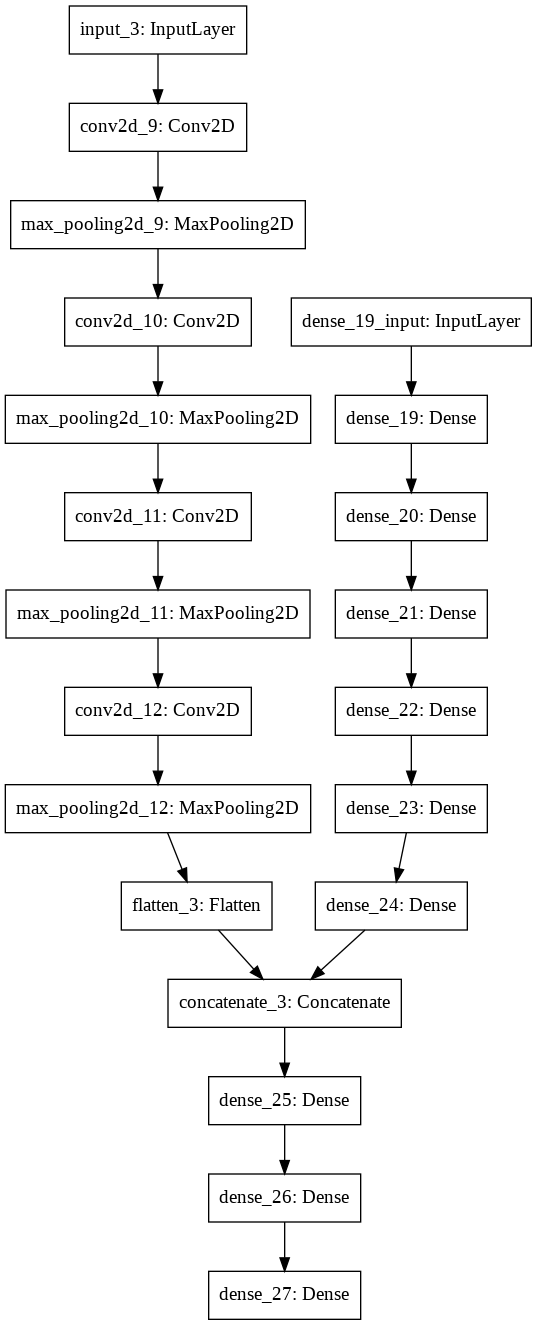

In [49]:
# Multiple Inputs
from sklearn import metrics
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Activation, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

#Model1
model1 = Sequential()
model1.add(Dense(512, input_dim=x_train.shape[1], activation="relu"))
model1.add(Dense(256,activation="relu"))
model1.add(Dense(128,activation="relu"))
model1.add(Dense(64,activation="relu"))
model1.add(Dense(32,activation="relu"))
model1.add(Dense(1))

#Model2
visible2 = Input(shape=(128,128,3))
conv1 = Conv2D(64, kernel_size=4, activation='relu')(visible2)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(32, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(16, kernel_size=4, activation='relu')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(16, kernel_size=4, activation='relu')(pool3)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
flat = Flatten()(pool4)


#Merging
merge = concatenate([model1.output, flat])

hidden1 = Dense(10, activation='relu')(merge)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation="relu")(hidden2)

model = Model(inputs=[model1.input, visible2], outputs=output)

print(model.summary())

plot_model(model,)

In [50]:
model.compile(loss="mean_squared_error", optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
model.fit([x_train,img_train], y_train, validation_data= ([x_test, img_test], y_test), callbacks=[monitor,checkpointer],verbose=2,epochs=200)
model.load_weights('best_weights.hdf5') # load weights from best model

Train on 284 samples, validate on 122 samples
Epoch 1/200
 - 1s - loss: 280456249574.7606 - val_loss: 278073968203.5410
Epoch 2/200
 - 0s - loss: 250335444761.2394 - val_loss: 176727262526.9508
Epoch 3/200
 - 0s - loss: 103086049885.7465 - val_loss: 70821043955.4098
Epoch 4/200
 - 0s - loss: 61172182809.2394 - val_loss: 69647658672.2623
Epoch 5/200
 - 0s - loss: 59474875464.1127 - val_loss: 51515977795.1475
Epoch 6/200
 - 0s - loss: 53976180995.6056 - val_loss: 49264308962.6229
Epoch 7/200
 - 0s - loss: 52720689036.6197 - val_loss: 47196869078.0328
Epoch 8/200
 - 0s - loss: 51846787879.6620 - val_loss: 47931188744.3934
Epoch 9/200
 - 0s - loss: 53825757472.4507 - val_loss: 47663521724.8525
Epoch 10/200
 - 0s - loss: 52715920658.0282 - val_loss: 48348320482.6229
Epoch 11/200
 - 0s - loss: 51918646199.8873 - val_loss: 47067486980.1967
Epoch 12/200
 - 0s - loss: 51262471845.8592 - val_loss: 46571553439.4754
Epoch 13/200
 - 0s - loss: 49320491498.3662 - val_loss: 45369945104.7869
Epoch 14/

Score (RMSE): 110323.75148492663


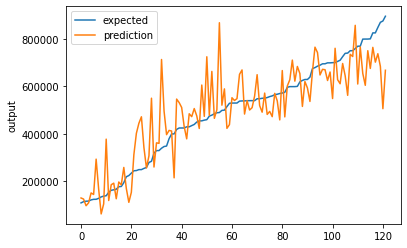

In [51]:
pred = model.predict([x_test, img_test])
rmse = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(rmse))

#regression lift Chart
chart_regression(pred.flatten(), y_test.to_numpy(), sort=True)